# Reading data

In [10]:
import pandas as pd
import numpy as np
import torch
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [11]:
PATH = os.path.join("data", "train.csv")
data = pd.read_csv(PATH)
data = shuffle(data)

In [15]:
data = data.dropna()

In [16]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
90999,2020-04-06,0.0,0.0,0,0,0,0.0,No,female,Other
92369,2020-04-06,0.0,0.0,0,0,0,0.0,No,male,Other
19347,2020-03-26,0.0,0.0,0,0,0,0.0,No,female,Other
81198,2020-04-05,0.0,0.0,0,0,0,0.0,Yes,male,Other
99303,2020-04-08,1.0,1.0,0,0,0,0.0,No,male,Abroad
...,...,...,...,...,...,...,...,...,...,...
74408,2020-04-03,0.0,0.0,0,0,0,0.0,No,female,Other
2958,2020-03-22,0.0,0.0,0,0,0,0.0,Yes,male,Other
3951,2020-03-23,0.0,0.0,0,0,0,0.0,No,male,Other
1515,2020-03-22,0.0,0.0,0,0,0,0.0,No,female,Other


In [17]:
y = data["corona_result"]
data["gender"] = data["gender"].map({"male": 1, "female": 0})
data["age_60_and_above"] = data["age_60_and_above"].map({"Yes": 1, "No": 0})
data["test_indication"] = data["test_indication"].map({"Contact with confirmed": 2, "Abroad": 1, "Other": 0})
data = data.drop(["test_date"], axis = 1)
data = data.fillna(-1)

In [18]:
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
90999,0.0,0.0,0,0,0,0.0,0,0,0
92369,0.0,0.0,0,0,0,0.0,0,1,0
19347,0.0,0.0,0,0,0,0.0,0,0,0
81198,0.0,0.0,0,0,0,0.0,1,1,0
99303,1.0,1.0,0,0,0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...
74408,0.0,0.0,0,0,0,0.0,0,0,0
2958,0.0,0.0,0,0,0,0.0,1,1,0
3951,0.0,0.0,0,0,0,0.0,0,1,0
1515,0.0,0.0,0,0,0,0.0,0,0,0


In [27]:
data["test_indication"].value_counts()

0    92517
1     9887
2     5138
Name: test_indication, dtype: int64

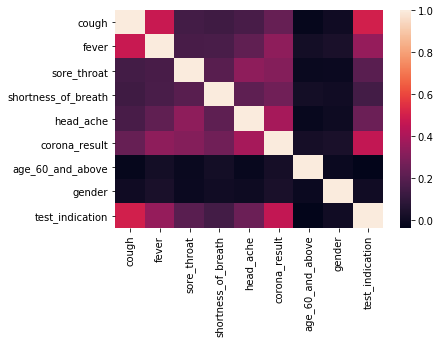

In [7]:
sns.heatmap(data.corr());

KeyboardInterrupt: 

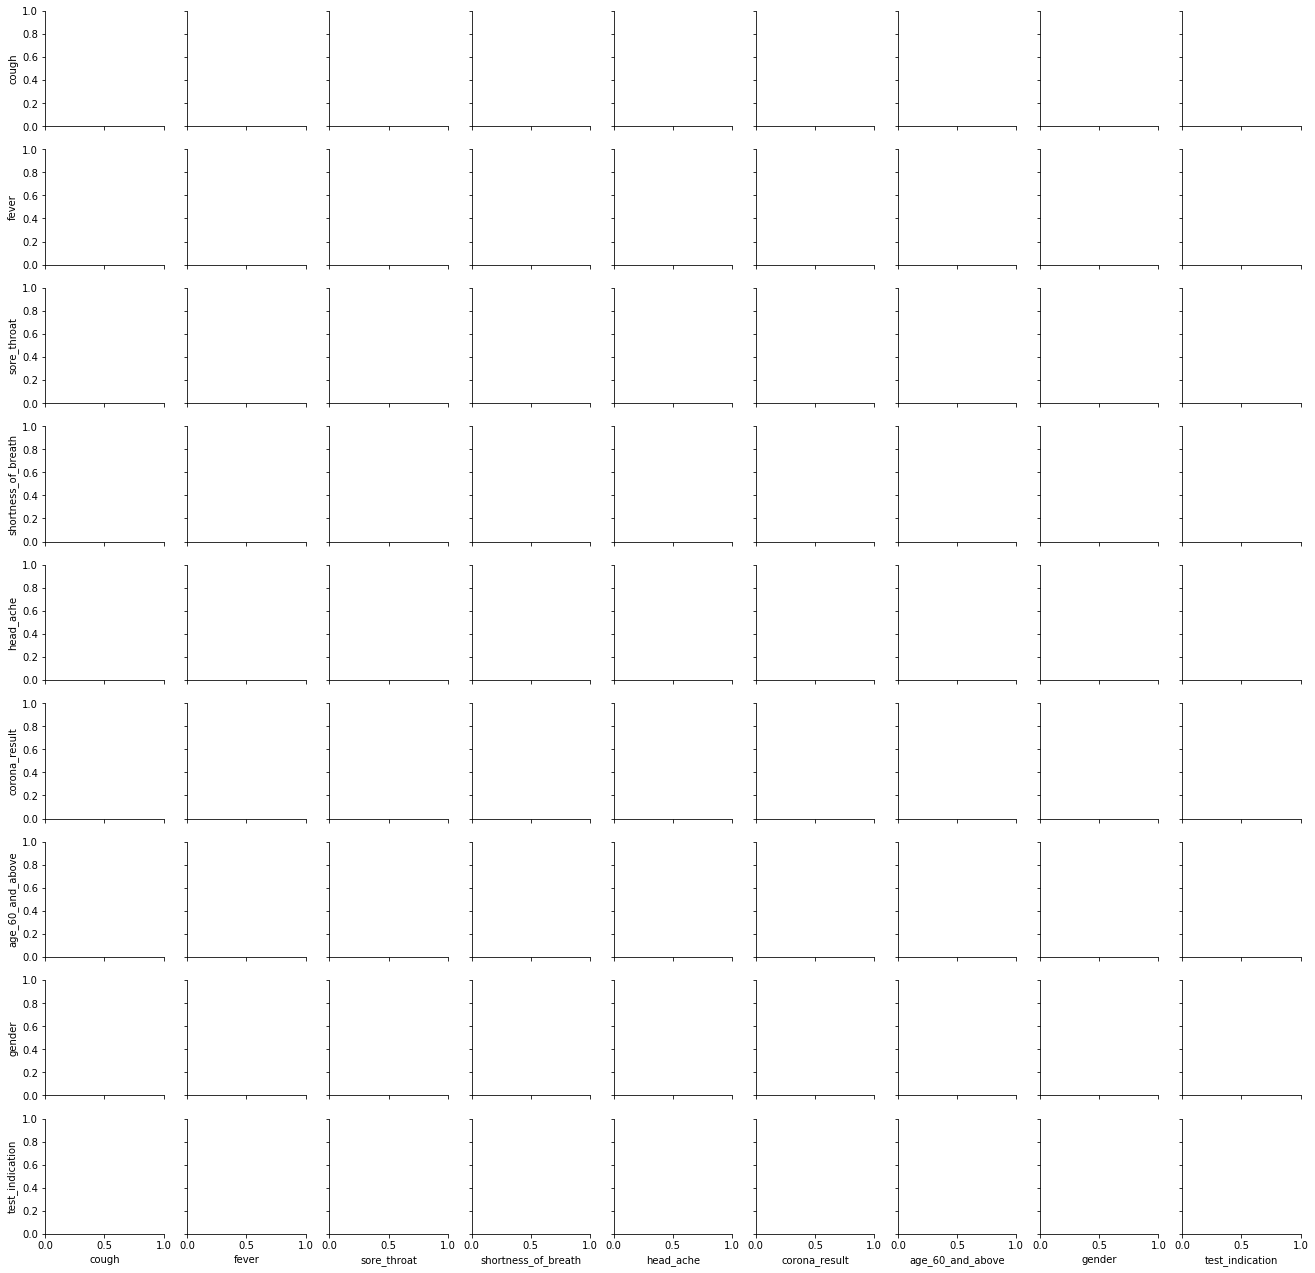

In [8]:
%config InlineBackend.figure_format = 'png'
# sns.pairplot(data[data.columns[1:]]);
sns.pairplot(data)

In [29]:
%%time
tsne = TSNE(n_components = 2, random_state = 11)
tsne_repr = tsne.fit_transform(StandardScaler().fit_transform(data.iloc[:36000, :]))

Wall time: 4min 48s


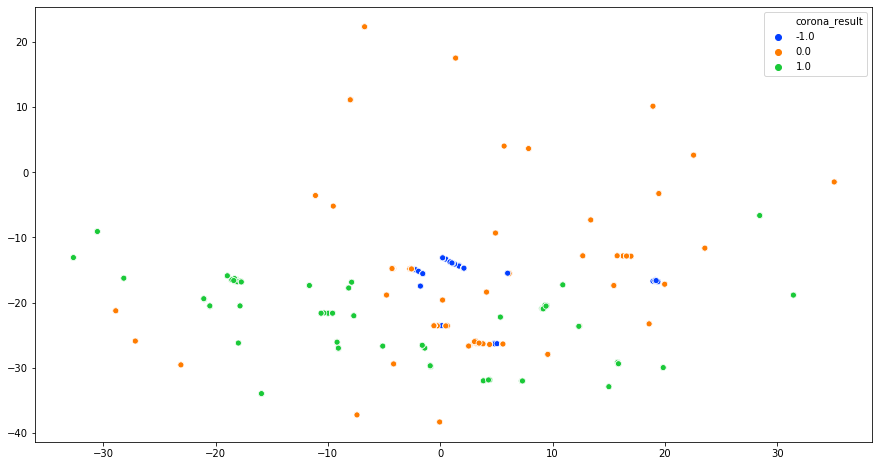

In [31]:
plt.figure(figsize = (15, 8))
sns.scatterplot(tsne_repr[:, 0], tsne_repr[:, 1], hue = data["corona_result"][:36000], \
                palette = sns.color_palette("bright")[:3]);

ValueError: 'c' argument has 112345 elements, which is not acceptable for use with 'x' with size 1200, 'y' with size 1200.

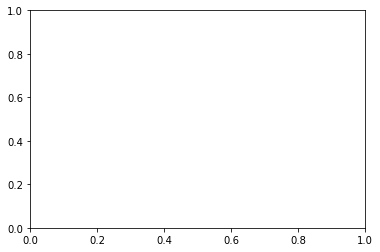

In [12]:
# plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
#             c = data['corona_result'].map({1: "red", 0: "green", -1: "yellow"}), alpha = 0.5);